# Supervised Classificaion Model

In [6]:
#Import libaraies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report
)
import matplotlib.pyplot as plt
import nbimporter
from pca_analysis import pca_df

## Split the dataset

In [2]:
# separating Features and Target
X_final = pca_df.drop("num", axis=1)

# Convert target to binary (0 = no disease, 1 = disease)
y_final = (pca_df["num"] > 0).astype(int)

print("Target distribution after binarization:")
print(y_final.value_counts())


Target distribution after binarization:
num
0    164
1    137
Name: count, dtype: int64


In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)


## Train the  models

In [4]:
#  Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # enable probability for ROC-AUC
}


#  Training & Evaluation

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Probabilities (for ROC-AUC)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc
    }
    
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))


#  Compare Results

import pandas as pd
results_df = pd.DataFrame(results).T
print("\nFinal Comparison of Models:")
print(results_df)



Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        28

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61


Training Decision Tree...

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    a

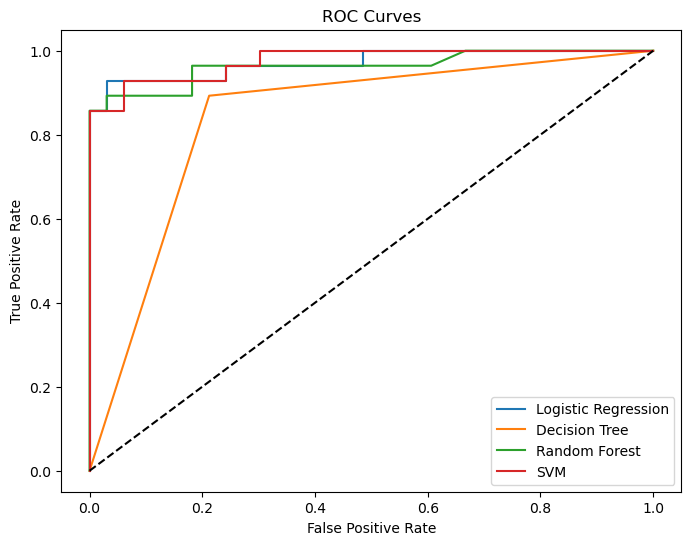

In [5]:
#  ROC Curve
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name}")
        
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()